# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

We didn't need the actor name dataset because we can use the nconst as a reference number through the principal and basics datasets and match these with each other

In [2]:
!wget 'https://datasets.imdbws.com/title.basics.tsv.gz'
!wget 'https://datasets.imdbws.com/title.akas.tsv.gz'
!wget 'https://datasets.imdbws.com/title.crew.tsv.gz'

--2021-12-05 19:19:28--  https://datasets.imdbws.com/title.basics.tsv.gz
Resolving datasets.imdbws.com (datasets.imdbws.com)... 52.85.79.70, 52.85.79.118, 52.85.79.112, ...
Connecting to datasets.imdbws.com (datasets.imdbws.com)|52.85.79.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148494068 (142M) [binary/octet-stream]
Saving to: ‘title.basics.tsv.gz’

title.basics.tsv.gz 100%[===================>] 141.61M  37.5MB/s    in 3.7s    

2021-12-05 19:19:31 (38.1 MB/s) - ‘title.basics.tsv.gz’ saved [148494068/148494068]

--2021-12-05 19:19:31--  https://datasets.imdbws.com/title.akas.tsv.gz
Resolving datasets.imdbws.com (datasets.imdbws.com)... 52.85.79.70, 52.85.79.118, 52.85.79.112, ...
Connecting to datasets.imdbws.com (datasets.imdbws.com)|52.85.79.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255248487 (243M) [binary/octet-stream]
Saving to: ‘title.akas.tsv.gz’

title.akas.tsv.gz   100%[===================>] 243.42M  83.1MB

In [3]:
!gunzip /content/title.basics.tsv.gz
!gunzip /content/title.akas.tsv.gz
!gunzip /content/title.crew.tsv.gz

In [20]:
akas = pd.read_csv('title.akas.tsv', sep='\t')
principals = pd.read_csv('title.crew.tsv', sep='\t')
movies = pd.read_csv('title.basics.tsv', sep='\t')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [134]:
!wget 'https://datasets.imdbws.com/title.ratings.tsv.gz'
!gunzip /content/title.ratings.tsv.gz

--2021-12-05 21:00:59--  https://datasets.imdbws.com/title.ratings.tsv.gz
Resolving datasets.imdbws.com (datasets.imdbws.com)... 52.85.79.118, 52.85.79.112, 52.85.79.70, ...
Connecting to datasets.imdbws.com (datasets.imdbws.com)|52.85.79.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5944352 (5.7M) [binary/octet-stream]
Saving to: ‘title.ratings.tsv.gz.2’

title.ratings.tsv.g 100%[===================>]   5.67M  24.4MB/s    in 0.2s    

2021-12-05 21:01:00 (24.4 MB/s) - ‘title.ratings.tsv.gz.2’ saved [5944352/5944352]



In [24]:
#Ratings

ratings = pd.read_csv('title.ratings.tsv', sep='\t')
df4 = ratings[['averageRating', 'numVotes']]
movies = movies.join(df4)

In [19]:
del movies

In [25]:

df2 = principals['directors']

movies = movies.join(df2)

In [8]:
akas[akas['types']=='original']['language'].value_counts()

\N     1815056
en           5
ja           1
da           1
yue          1
cmn          1
ca           1
Name: language, dtype: int64

In [26]:
#movies dataset setup
movies.drop('primaryTitle', axis=1, inplace=True)
movies = movies[movies['titleType'] != 'tvPilot']
movies = movies[movies['titleType'] != 'videoGame']
movies = movies[movies['titleType'] != 'tvShort']
movies = movies[movies['titleType'] != 'video']
movies = movies[movies['titleType'] != 'tvEpisode']
movies = movies[movies['titleType'] != 'Short']

movies['genres'].value_counts()

Drama,Short                    159549
Drama                          157893
Documentary                    146593
Short                          141418
Comedy,Short                   111088
                                ...  
Adventure,Sport,Thriller            1
Action,Biography,Mystery            1
Adult,Adventure,Mystery             1
Fantasy,Reality-TV,Romance          1
Documentary,Game-Show,Music         1
Name: genres, Length: 2235, dtype: int64

In [57]:
movies = movies[movies['averageRating'] >= 2.0]
movies = movies[movies['numVotes'] >= 20.0]

In [27]:

movies['startYear'].replace(to_replace = r"\N", value= 2000, inplace=True)
movies['startYear'] = pd.to_numeric(movies['startYear'])
movies = movies[movies['startYear'] < 2022]

In [28]:
new = movies["genres"].str.split(",", n=2 ,expand = True)
  
# making separate first name column from new data frame
movies["genre1"]= new[0]
movies["genre2"]= new[1]
movies["genre3"]= new[2]
  
# Dropping old Name columns
movies.drop(columns =["genres"], inplace = True)

In [29]:
movies.head()

,tconst,titleType,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,directors,genre1,genre2,genre3
0,tt0000001,short,Carmencita,0,1894,\N,1,5.7,1841.0,nm0005690,Documentary,Short,None
1,tt0000002,short,Le clown et ses chiens,0,1892,\N,5,6.0,236.0,nm0721526,Animation,Short,None
2,tt0000003,short,Pauvre Pierrot,0,1892,\N,4,6.5,1603.0,nm0721526,Animation,Comedy,Romance
3,tt0000004,short,Un bon bock,0,1892,\N,12,6.0,153.0,nm0721526,Animation,Short,None
4,tt0000005,short,Blacksmith Scene,0,1893,\N,1,6.2,2422.0,nm0005690,Comedy,Short,None


#Movie name input

In [42]:
#base title
title = input()

#Year of production
year = input()
year = int(year)

#ٍSepcify Title Type
titletype = movies[(movies['originalTitle']==title) & (movies['startYear']==year)]['titleType'].iloc[0]
#finding movie genre
genre = movies[(movies['originalTitle'] == title) & (movies['startYear']==year)]['genre1'].iloc[0]

#finding directors
director = movies[(movies['originalTitle'] == title)& (movies['startYear']==year)]['directors'].iloc[0]



The Irishman
2019


In [43]:
print(genre)
print(director)
print(year)
print(titletype)

Biography
nm0000217
2019
movie


In [52]:
#output 1 (genre)
result = movies[(movies['genre1'] == genre) & (movies['titleType']==titletype)]['originalTitle'].sample().iloc[0]
result2=0
#output 2 (genre + director)
if ((movies[(movies['directors'].str.contains(director, case=False)) & (movies['genre1']==genre) & (movies['titleType']==titletype)]['originalTitle'])).empty == False:
  result2 = movies.loc[(movies['directors']==director) & ((movies['genre1']==genre) | (movies['genre2']==genre) | (movies['genre3']==genre)) & (movies['titleType']==titletype)]['originalTitle'].sample().iloc[0]

#output 3 (genre + year)
res3 = movies[movies['startYear'].between(year-20, year+20)]
result3 = res3[(((res3['genre1'].str.contains(genre, case=False)) | (movies['genre2'].str.contains(genre, case=False)) | (movies['genre3'].str.contains(genre, case=False)))) & (movies['titleType']==titletype)]['originalTitle'].sample().iloc[0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


#Output Cell

In [53]:

print(result)
print(result2)
print(result3)

Zorn
Shine a Light
...But I Was a Girl: The Story of Frieda Belinfante


#ٌReverse engineering

In [30]:
movies[movies['originalTitle']=="The Sopranos"]['numVotes']

137665    221.0
Name: numVotes, dtype: float64

In [10]:
movies[movies['numVotes']== 0]

,tconst,titleType,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,directors,genre1,genre2,genre3


In [170]:
movies.head()

AttributeError: ignored

In [13]:
movies['numVotes'].isna().value_counts()

True     1357532
False     499935
Name: numVotes, dtype: int64

In [151]:
movies['nu'].dropna(inplace=True)

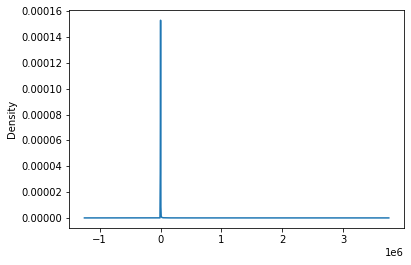

In [58]:

movies['numVotes'].plot.density()

In [14]:
movies['numVotes'].fillna(value= 0,inplace=True)
movies['numVotes'].replace(to_replace = '\n', value = 0)


0          1841.0
1           236.0
2          1603.0
3           153.0
4          2422.0
            ...  
8468587       0.0
8468597       0.0
8468598       0.0
8468602       0.0
8468645       0.0
Name: numVotes, Length: 1857467, dtype: float64

In [20]:

movies.plot.pie(movies['numVotes'])

TypeError: ignored

In [56]:
movies['numVotes'].sample(n=50)

1004567     690.0
107588       34.0
1018813       5.0
186553       10.0
311361      253.0
190923     3293.0
1186833     187.0
885686       68.0
289274       39.0
152497      738.0
49327      1073.0
439565       54.0
214763     1112.0
17248      1205.0
68272       203.0
1078702      67.0
341071       14.0
253601       16.0
271226      544.0
373963       15.0
87297       172.0
444390       15.0
312956       31.0
875188       10.0
194711       14.0
97684        21.0
313886       19.0
376185      122.0
105069      158.0
331691       59.0
445971       39.0
160115      164.0
279616       37.0
224385       14.0
930796      326.0
806416       37.0
275681       20.0
401415       11.0
959786        6.0
1190129      12.0
113393       39.0
14004        23.0
1075528      26.0
477802        7.0
22457       140.0
351493      130.0
44769       187.0
138078      402.0
110318      130.0
102479       98.0
Name: numVotes, dtype: float64

In [17]:
movies.plot.pie(movies['numVotes'])

TypeError: ignored